In [185]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import sklearn.metrics as metrics

In [186]:
from utilities import *


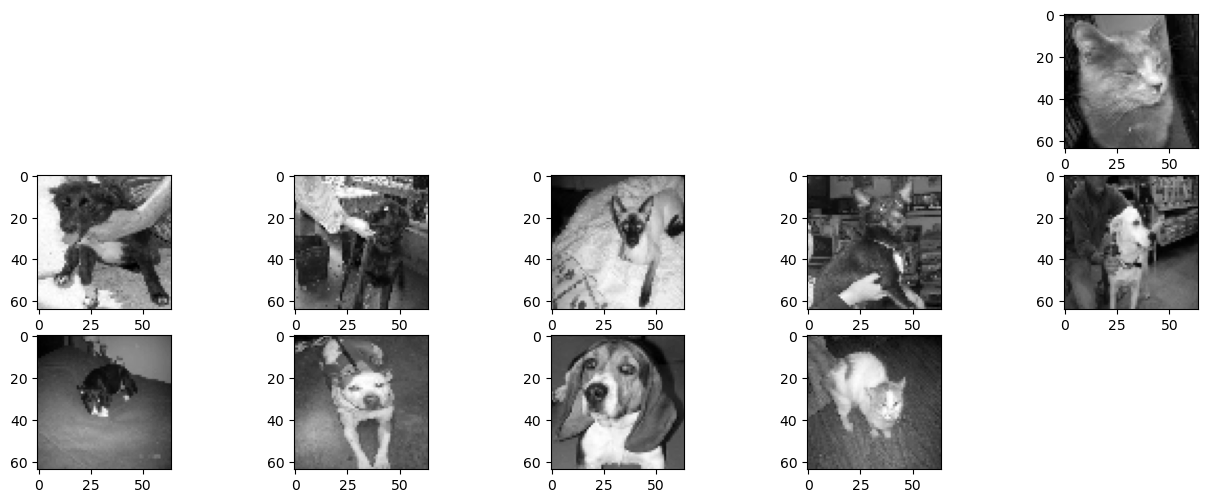

X_train shape: (1000, 64, 64)
X_test shape: (200, 64, 64)


In [187]:
X_train,y_train,X_test,y_test=load_data()
plt.figure(figsize=(16,8))
for i in range(10,20):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i],cmap='gray')
    plt.tight_layout
plt.show()
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

In [188]:
# Assuming X_train and X_test are NumPy arrays
print("Number of channels in X_train:", X_train.shape[-1])
print("Number of channels in X_test:", X_test.shape[-1])


Number of channels in X_train: 64
Number of channels in X_test: 64


reshaping 

In [189]:
X_train = X_train.reshape(-1,64,64,1)
X_test = X_test.reshape(-1,64,64,1)
y_test=y_test.reshape(-1,)
y_train=y_train.reshape(-1,)


print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1000, 64, 64, 1)
y_train shape: (1000,)
X_test shape: (200, 64, 64, 1)
y_test shape: (200,)


normalisation

In [190]:
print("before normalisation : min:{} , max:{}".format(X_train.min() , X_train.max()))
X_train=X_train/X_train.max()
X_test=X_test/X_test.max()
print("after normalisation : min:{} , max:{}".format(X_train.min() , X_train.max()))

before normalisation : min:0 , max:254
after normalisation : min:0.0 , max:1.0


CREATION DU MODEL

In [192]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(shape=(64, 64, 1)))

model.add(keras.layers.Conv2D(8, (3,3) , activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

# Add another convolutional layer
model.add(keras.layers.Conv2D(16, (3,3) , activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

# Add more convolutional layers as needed
model.add(keras.layers.Conv2D(32, (3,3) , activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

# Add more convolutional layers as needed
model.add(keras.layers.Conv2D(64, (3,3) , activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 62, 62, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 31, 31, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 31, 31, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 29, 29, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,094 (199.59 KB)

 Trainable params: 51,094 (199.59 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
batch_size=512
epochs=16

history = model.fit( X_train , y_train , batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,y_test))

Epoch 1/16
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.2610 - loss: 2.2003 - val_accuracy: 0.5000 - val_loss: 2.1245
Epoch 2/16
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.4392 - loss: 1.8700 - val_accuracy: 0.5000 - val_loss: 1.8776
Epoch 3/16
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.4697 - loss: 1.4876 - val_accuracy: 0.5000 - val_loss: 1.4581
Epoch 4/16
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.4882 - loss: 1.1615 - val_accuracy: 0.4750 - val_loss: 1.0130
Epoch 5/16
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5033 - loss: 1.0764 - val_accuracy: 0.5400 - val_loss: 0.8138
Epoch 6/16
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.4947 - loss: 1.1304 - val_accuracy: 0.4750 - val_loss: 0.7760
Epoch 7/16
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5435 - loss: 0.9956 - val_accuracy: 0.4950 - val_loss: 0.7939
Epoch 8/16
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.4814 - loss: 1.0033 - val_accuracy: 0.5150 - val_loss:

In [195]:
score = model.evaluate(X_test , y_test )
print(f'test loss : {score[0]:4.4f}')
print(f'test accuracy : {score[1]:4.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5132 - loss: 0.8099 
test loss : 0.8081
test accuracy : 0.5000


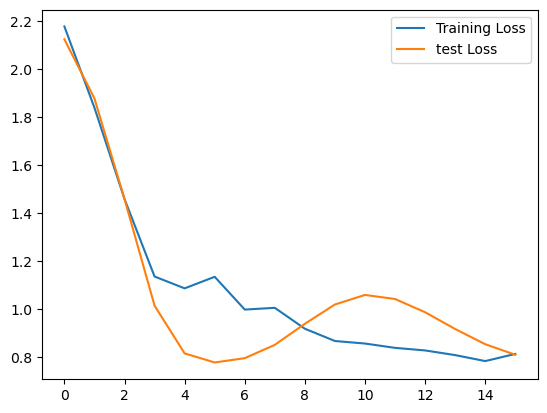

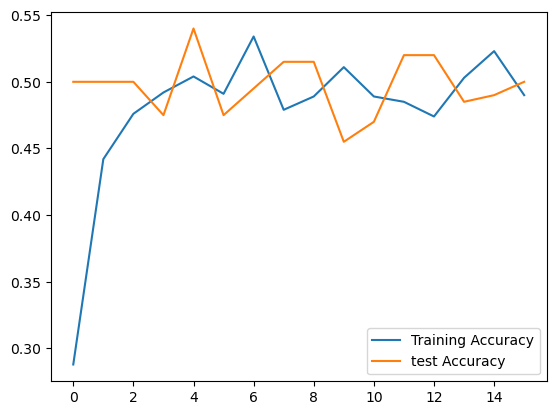

In [196]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='test Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='test Accuracy')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


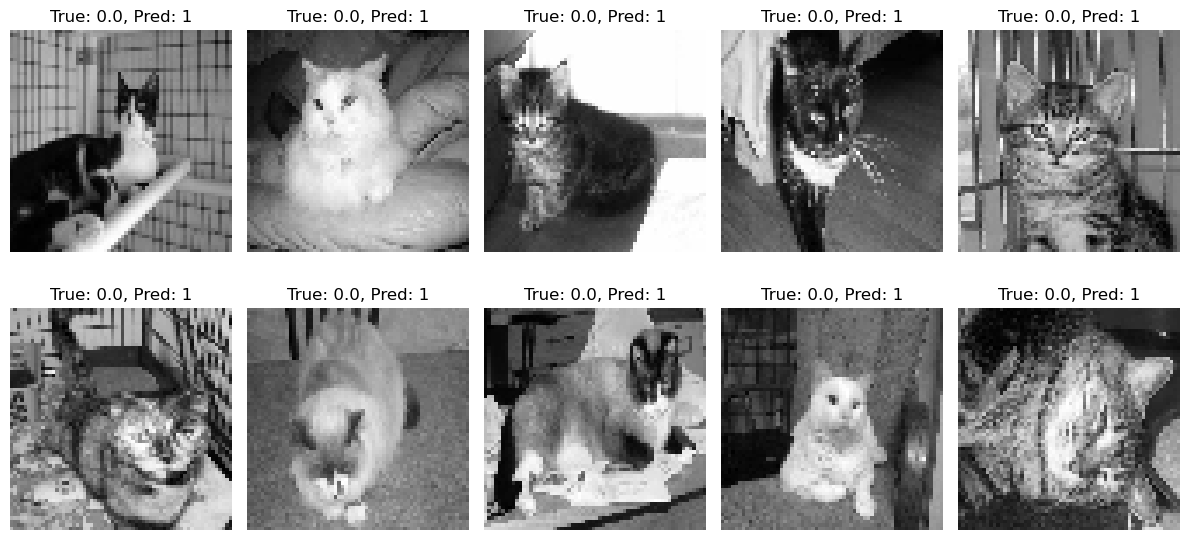

In [197]:
y_sigmoid = model.predict(X_test)
y_pred=np.argmax(y_sigmoid , axis= -1)
errors = [ i for i in range(len(X_test)) if y_pred[i] != y_test[i]]
plt.figure(figsize=(12, 6))
num_errors_to_display = 10
for i in range( min(num_errors_to_display , len(errors))):
    error_index = errors[i]
    plt.subplot(2, 5 , i + 1)  #i + 1 to index subplots from 1
    plt.imshow(X_test[error_index], cmap='gray')
    plt.title(f"True: {y_test[error_index]}, Pred: {y_pred[error_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()